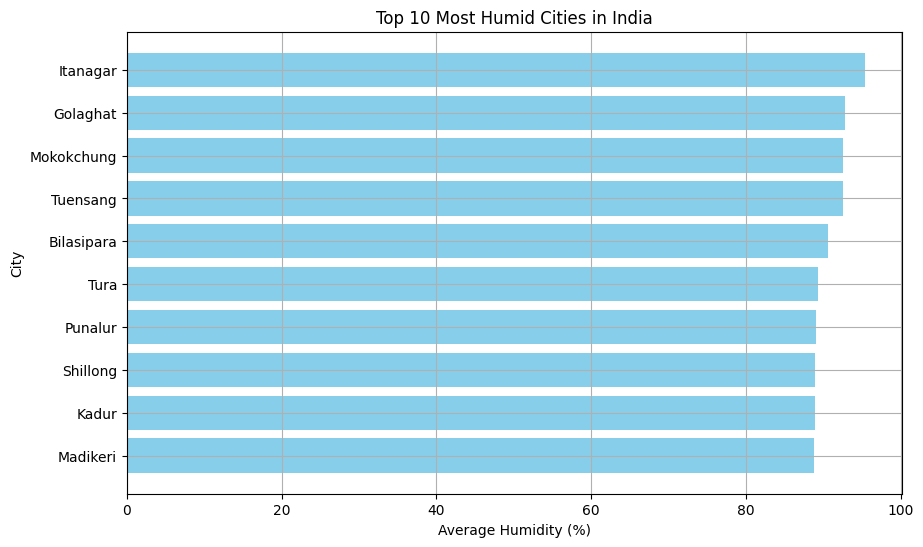

In [ ]:
import sqlite3
import matplotlib.pyplot as plt

conn = sqlite3.connect("data.db")
cursor = conn.cursor()

cursor.execute("""
    SELECT location_name, avg_humidity
    FROM global_weather
    ORDER BY avg_humidity DESC
    LIMIT 10;
""")

data = cursor.fetchall()
cities, humidity = zip(*data)

plt.figure(figsize=(10, 6))
plt.barh(cities[::-1], humidity[::-1], color='skyblue')
plt.title("Top 10 Most Humid Cities in India")
plt.xlabel("Average Humidity (%)")
plt.ylabel("City")
plt.grid(True)
plt.show()





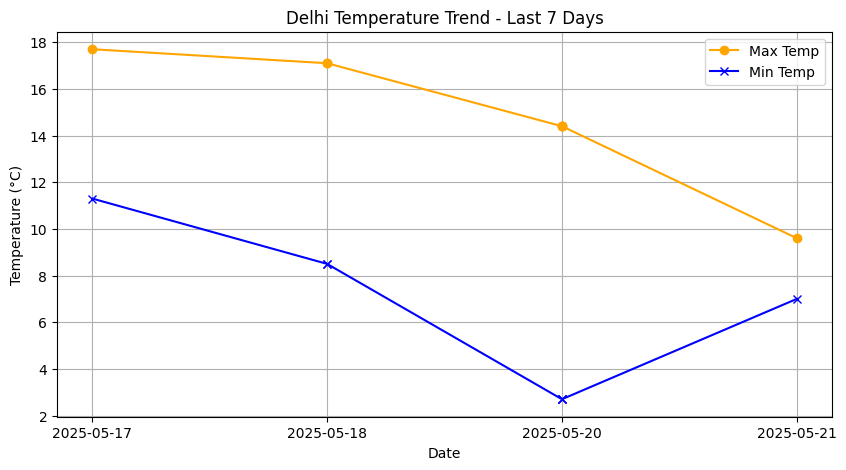

In [4]:

cursor.execute("""
    SELECT date, max_temp, min_temp
    FROM daily_weather
    WHERE location_name = 'Delhi'
    ORDER BY date DESC
    LIMIT 7;
""")

rows = cursor.fetchall()
dates, max_temp, min_temp = zip(*rows[::-1])

plt.figure(figsize=(10, 5))
plt.plot(dates, max_temp, marker='o', label='Max Temp', color='orange')
plt.plot(dates, min_temp, marker='x', label='Min Temp', color='blue')
plt.title("Delhi Temperature Trend - Last 7 Days")
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.legend()
plt.grid(True)
plt.show()




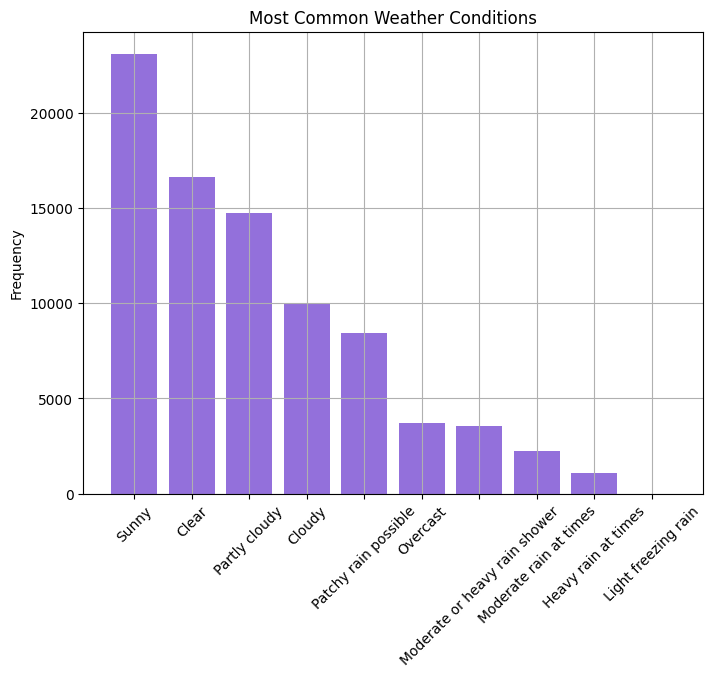

In [5]:
cursor = conn.cursor()

cursor.execute("""
    SELECT condition, COUNT(*) as freq
    FROM weather
    GROUP BY condition
    ORDER BY freq DESC
    LIMIT 10;
""")

conditions = cursor.fetchall()
labels, counts = zip(*conditions)

plt.figure(figsize=(8, 6))
plt.bar(labels, counts, color='mediumpurple')
plt.xticks(rotation=45)
plt.title("Most Common Weather Conditions")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

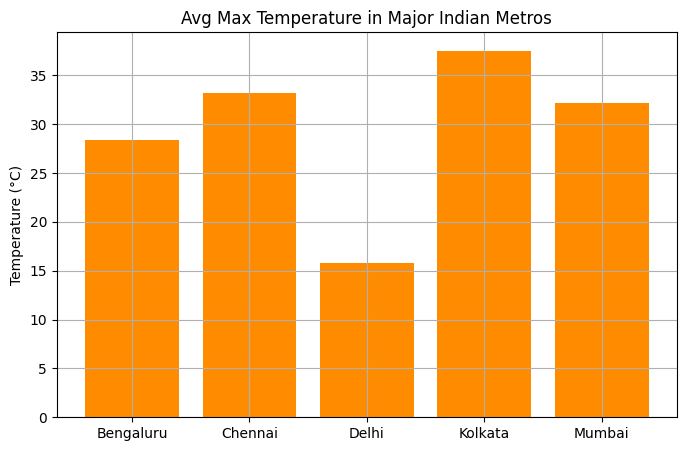

In [7]:
metros = ['Delhi', 'Mumbai', 'Kolkata', 'Chennai', 'Bengaluru']

conn = sqlite3.connect("data.db")
cursor = conn.cursor()

cursor.execute(f"""
    SELECT location_name, ROUND(AVG(max_temp), 2)
    FROM daily_weather
    WHERE location_name IN ({','.join(['?']*len(metros))})
    GROUP BY location_name
""", metros)

rows = cursor.fetchall()
cities, avg_max = zip(*rows)

plt.figure(figsize=(8, 5))
plt.bar(cities, avg_max, color='darkorange')
plt.title("Avg Max Temperature in Major Indian Metros")
plt.ylabel("Temperature (°C)")
plt.grid(True)
plt.show()

conn.close()